In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv(r"C:\\Users\\lenovo\\Downloads\\Admission_Predict_Ver1.1.csv")
df.head(3)


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72


In [4]:
df.shape

(500, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.drop(columns='Serial No.' , inplace=True)

In [8]:
df.head(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76


In [9]:
df.head(1)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92


In [10]:
X = df.iloc[: , 0:-1]
y = df.iloc[: , -1]

In [11]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [12]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [13]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2 , random_state=1)

In [14]:
X_train.shape

(400, 7)

In [15]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
X_train_scaled

array([[0.4       , 0.42857143, 0.5       , ..., 0.57142857, 0.50320513,
        0.        ],
       [0.56      , 0.64285714, 0.        , ..., 0.57142857, 0.55769231,
        1.        ],
       [0.2       , 0.32142857, 0.5       , ..., 0.28571429, 0.34615385,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.74038462,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.77884615,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.32051282,
        0.        ]], shape=(400, 7))

In [27]:
model = Sequential()

model.add(Dense(7 , activation='relu' , input_dim =7)) #input to hidden layer
model.add(Dense(7 , activation='relu')) 
model.add(Dense(1 , activation='linear'))  #in reg activation of last node always be linear

c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(loss='mean_squared_error' , optimizer='Adam' )

In [30]:
history = model.fit(X_train_scaled, y_train , epochs=100 , validation_split=0.2)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - loss: 2.3660 - val_loss: 2.2138
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 1.8391 - val_loss: 1.6968
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1.4002 - val_loss: 1.2821
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1.0457 - val_loss: 0.9541
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.7759 - val_loss: 0.7010
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.5686 - val_loss: 0.5153
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.4101 - val_loss: 0.3815
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 0.3022 - val_loss: 0.2825
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2226 - val_loss: 0.2132
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.1689 - val_loss: 0.1641
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1302 - val_loss: 0.1299
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

In [31]:
y_pred = model.predict(X_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


In [32]:
r2_score(y_test , y_pred)

0.6994785396613801

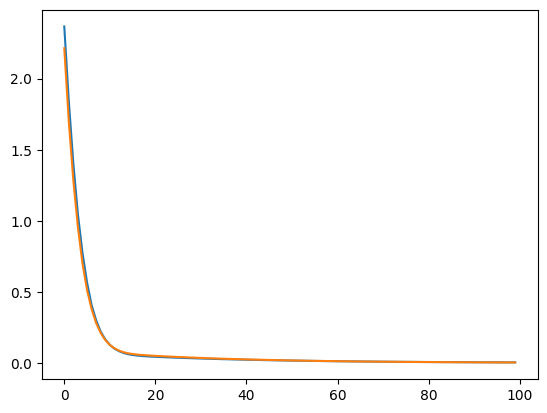

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])